# 1. Importing Libraries

In this section, I will import the libraries that I will use in this project. I will import the following libraries:

- numpy for numerical computing
- pandas for data manipulation
- matplotlib for plotting
- seaborn for plotting
- sklearn for machine learning
- scipy for scientific computing
- statsmodels for statistical modeling

In [645]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 2. Loading and Preparing the Data

In this section, I will load the data that I will use in this project. I will load the data from the CSV files using the pandas library. I will load the data into a pandas DataFrame. After this, I will prepare the data for analysis. 

I will check for missing values, duplicates, and outliers. I will also perform data cleaning and data transformations as needed, such as grouping data by country and year, renaming columns, and filtering data based on specific criteria.


## 2.1 Fertilizers Used Data

In [646]:
# Load the dataset
fertilizers_use_df = pd.read_csv("Data/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the Fertilizers Used data
fertilizers_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.0,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.0,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.0,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.0,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.0,I,Imputed value


In [647]:
# Describe the Fertilizers Used data
fertilizers_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,17807.000000,17807.0,17807.000000,17807.000000,17807.000000,1.780700e+04
mean,428.095861,5157.0,4013.974224,2011.259224,2011.259224,2.124516e+05
std,252.862476,0.0,9.034514,5.443312,5.443312,1.408350e+06
min,4.000000,5157.0,4001.000000,2002.000000,2002.000000,0.000000e+00
25%,208.000000,5157.0,4004.000000,2007.000000,2007.000000,1.000000e+02
50%,414.000000,5157.0,4016.000000,2011.000000,2011.000000,3.584000e+03
75%,620.000000,5157.0,4022.000000,2016.000000,2016.000000,4.573800e+04
max,894.000000,5157.0,4030.000000,2021.000000,2021.000000,9.621329e+07


In [648]:
# Print information about the Fertilizers Used data
fertilizers_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17807 entries, 0 to 17806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       17807 non-null  object 
 1   Domain            17807 non-null  object 
 2   Area Code (M49)   17807 non-null  int64  
 3   Area              17807 non-null  object 
 4   Element Code      17807 non-null  int64  
 5   Element           17807 non-null  object 
 6   Item Code         17807 non-null  int64  
 7   Item              17807 non-null  object 
 8   Year Code         17807 non-null  int64  
 9   Year              17807 non-null  int64  
 10  Unit              17807 non-null  object 
 11  Value             17807 non-null  float64
 12  Flag              17807 non-null  object 
 13  Flag Description  17807 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.9+ MB


In [649]:
# Filter data to only take official figures and from after the year 2010
fertilizers_use_df = fertilizers_use_df[(fertilizers_use_df['Year'] >= 2000) & fertilizers_use_df['Flag Description'].str.contains('Official figure')]

# Drop unnecessary columns
fertilizers_use_df = fertilizers_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)'])
# Group data by country and year
fertilizers_use_df = fertilizers_use_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Rename the column
fertilizers_use_df = fertilizers_use_df.rename(columns={'Value': 'Total Fertilizers Used in Tonnes'})


In [650]:
# Check for missing values and remove them if found
if fertilizers_use_df.isnull().sum().sum() > 0:
    fertilizers_use_df.dropna(inplace=True)

In [651]:
# If duplicates are found, remove them
if fertilizers_use_df.duplicated().sum() > 0:
    fertilizers_use_df.drop_duplicates(inplace=True)

In [652]:
# Display the prepared dataset
fertilizers_use_df.head(100)

,Area,Year,Total Fertilizers Used in Tonnes
0,Afghanistan,2018,519122.000000
1,Albania,2002,39908.666667
2,Albania,2003,39967.666667
3,Albania,2004,25846.200000
4,Albania,2005,26666.000000
...,...,...,...
95,Bhutan,2015,605.810000
96,Bhutan,2016,488.387143
97,Bhutan,2017,409.928571
98,Bhutan,2018,528.475000


## 2.2 Land Temperature Change Data


In [653]:
# Load the dataset
land_temp_change_df = pd.read_csv("Data/Land temperature change - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the Land Temp Change data
land_temp_change_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value


In [654]:
# Describe the Land Temp Change data
land_temp_change_df.describe()

,Area Code (M49),Element Code,Months Code,Year Code,Year,Value
count,54810.000000,54810.000000,54810.000000,54810.000000,54810.000000,48255.000000
mean,434.977194,6674.500000,7018.000000,2011.021346,2011.021346,0.802197
std,253.978304,596.505442,1.414226,6.629795,6.629795,0.669648
min,4.000000,6078.000000,7016.000000,2000.000000,2000.000000,-4.176000
25%,214.000000,6078.000000,7017.000000,2005.000000,2005.000000,0.364000
50%,434.000000,6674.500000,7018.000000,2011.000000,2011.000000,0.643000
75%,654.000000,7271.000000,7019.000000,2017.000000,2017.000000,1.084000
max,894.000000,7271.000000,7020.000000,2022.000000,2022.000000,8.200000


In [655]:
# Print information about the Land Temperature Change data
land_temp_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54810 entries, 0 to 54809
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       54810 non-null  object 
 1   Domain            54810 non-null  object 
 2   Area Code (M49)   54810 non-null  int64  
 3   Area              54810 non-null  object 
 4   Element Code      54810 non-null  int64  
 5   Element           54810 non-null  object 
 6   Months Code       54810 non-null  int64  
 7   Months            54810 non-null  object 
 8   Year Code         54810 non-null  int64  
 9   Year              54810 non-null  int64  
 10  Unit              54810 non-null  object 
 11  Value             48255 non-null  float64
 12  Flag              54810 non-null  object 
 13  Flag Description  54810 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 5.9+ MB


In [656]:
land_temp_change_df = land_temp_change_df[(land_temp_change_df['Year'] >= 2000) & land_temp_change_df['Months'].str.contains('Meteorological year')]

land_temp_change_df = land_temp_change_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)'])

# land_temp_change_df = land_temp_change_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

land_temp_change_df = land_temp_change_df.rename(columns={'Value': 'Total Land Temperature Change in Celsius'})

In [657]:
# Check for missing values
land_temp_change_df.isnull().sum()

Area                                           0
Year                                           0
Total Land Temperature Change in Celsius    1319
dtype: int64

In [658]:
# If duplicates are found, remove them
if land_temp_change_df.duplicated().sum() > 0:
    land_temp_change_df.drop_duplicates(inplace=True)

In [659]:
# display final dataset
land_temp_change_df.head(100)

,Area,Year,Total Land Temperature Change in Celsius
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373
...,...,...,...
647,Algeria,2003,1.585
648,Algeria,2004,0.988
649,Algeria,2005,1.264
650,Algeria,2006,1.395


## 2.3 Pesticides Use Data

In [660]:
# Load the dataset
pesticides_use_df = pd.read_csv("Data/Pesticides use - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the pesticides use data
pesticides_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN


In [661]:
# Describing the pesticides use data
pesticides_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000,35202.000000
mean,424.550423,5158.978694,1340.576445,2010.510852,2010.510852,3855.186176
std,248.441525,4.950079,17.776129,6.341302,6.341302,24198.051890
min,8.000000,5157.000000,1309.000000,2000.000000,2000.000000,0.000000
25%,208.000000,5157.000000,1320.000000,2005.000000,2005.000000,0.430000
50%,418.000000,5157.000000,1345.000000,2011.000000,2011.000000,8.075000
75%,626.000000,5157.000000,1357.000000,2016.000000,2016.000000,366.012500
max,894.000000,5173.000000,1357.000000,2021.000000,2021.000000,719507.440000


In [662]:
# Printing information about the pesticides use data
pesticides_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35202 entries, 0 to 35201
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       35202 non-null  object 
 1   Domain            35202 non-null  object 
 2   Area Code (M49)   35202 non-null  int64  
 3   Area              35202 non-null  object 
 4   Element Code      35202 non-null  int64  
 5   Element           35202 non-null  object 
 6   Item Code         35202 non-null  int64  
 7   Item              35202 non-null  object 
 8   Year Code         35202 non-null  int64  
 9   Year              35202 non-null  int64  
 10  Unit              35202 non-null  object 
 11  Value             35202 non-null  float64
 12  Flag              35202 non-null  object 
 13  Flag Description  35202 non-null  object 
 14  Note              198 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 4.0+ MB


In [663]:
# Filter data to only take agricultural use and from after the year 2010
pesticides_use_df = pesticides_use_df[(pesticides_use_df['Year'] >= 2000) & pesticides_use_df['Element'].str.contains('Agricultural Use')]

# Drop unnecessary columns
pesticides_use_df = pesticides_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Rename the column
pesticides_use_df = pesticides_use_df.rename(columns={'Value': 'Total Pesticides Used in Tonnes'})

In [664]:
# Check for NaN values and remove
if pesticides_use_df.isnull().sum().sum() > 0:
    pesticides_use_df.dropna(inplace=True)

In [665]:
# Check for duplicates and remove them
if pesticides_use_df.duplicated().sum() > 0:
    pesticides_use_df.drop_duplicates(inplace=True)

In [666]:
# Display final dataset
pesticides_use_df.head(100)

,Area,Year,Total Pesticides Used in Tonnes
0,Albania,2000,307.98
3,Albania,2001,319.38
6,Albania,2002,330.78
9,Albania,2003,342.17
12,Albania,2004,353.57
...,...,...,...
139,Albania,2007,0.13
140,Albania,2008,0.14
141,Albania,2009,0.15
142,Albania,2010,0.16


## 2.4 Food Trade Data

In [667]:
# Load the dataset
food_trade_df = pd.read_csv("Data/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the Food Trade data
food_trade_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.0,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.0,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.0,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.0,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.0,E,Estimated value,NaN


In [668]:
# Describe the Food Trade data
food_trade_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,141738.000000,141738.000000,141738.000000,141738.000000,1.417380e+05,0.0
mean,424.988359,5765.555010,2006.724273,2006.724273,4.572981e+05,NaN
std,253.512489,149.862005,9.168199,9.168199,1.876930e+06,NaN
min,4.000000,5622.000000,1991.000000,1991.000000,0.000000e+00,NaN
25%,204.000000,5622.000000,1999.000000,1999.000000,2.150000e+03,NaN
50%,414.000000,5622.000000,2007.000000,2007.000000,2.406200e+04,NaN
75%,643.000000,5922.000000,2015.000000,2015.000000,1.764239e+05,NaN
max,894.000000,5922.000000,2022.000000,2022.000000,8.355806e+07,NaN


In [669]:
# Print information about the Food Trade data
food_trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141738 entries, 0 to 141737
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       141738 non-null  object 
 1   Domain            141738 non-null  object 
 2   Area Code (M49)   141738 non-null  int64  
 3   Area              141738 non-null  object 
 4   Element Code      141738 non-null  int64  
 5   Element           141738 non-null  object 
 6   Item Code (CPC)   141738 non-null  object 
 7   Item              141738 non-null  object 
 8   Year Code         141738 non-null  int64  
 9   Year              141738 non-null  int64  
 10  Unit              141738 non-null  object 
 11  Value             141738 non-null  float64
 12  Flag              141738 non-null  object 
 13  Flag Description  141738 non-null  object 
 14  Note              0 non-null       float64
dtypes: float64(2), int64(4), object(9)
memory usage: 16.2+ MB


In [670]:
# Filter data to only take export value and from after the year 2010
food_trade_df = food_trade_df[(food_trade_df['Year'] >= 2000) & food_trade_df['Element'].str.contains('Export Value')]

# Drop unnecessary columns
food_trade_df = food_trade_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Group data by country and year
food_trade_df = food_trade_df.groupby(["Area", "Year"])["Value"].sum().reset_index()

# Rename the column
food_trade_df = food_trade_df.rename(columns={'Value': 'Total Export Value per 1000 US$'})

food_trade_df.head()

,Area,Year,Total Export Value per 1000 US$
0,Afghanistan,2000,43095.0
1,Afghanistan,2001,35440.0
2,Afghanistan,2002,35964.0
3,Afghanistan,2003,58782.0
4,Afghanistan,2004,64919.0


In [671]:
# Check for missing values
food_trade_df.isnull().sum()

Area                               0
Year                               0
Total Export Value per 1000 US$    0
dtype: int64

## 2.5 Land Use Data

In [672]:
# Load the dataset
land_use_df = pd.read_csv("Data/Land use - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the Land Use data
land_use_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN


In [673]:
# Describe the Land Use data
land_use_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,97995.000000,97995.0,97995.000000,97995.000000,97995.000000,9.799500e+04
mean,430.530884,5110.0,6627.879984,2002.966988,2002.966988,2.044488e+04
std,255.076689,0.0,26.601230,11.828224,11.828224,9.502952e+04
min,4.000000,5110.0,6600.000000,1980.000000,1980.000000,0.000000e+00
25%,208.000000,5110.0,6602.000000,1993.000000,1993.000000,3.000000e+01
50%,426.000000,5110.0,6621.000000,2004.000000,2004.000000,7.037793e+02
75%,646.000000,5110.0,6650.000000,2013.000000,2013.000000,6.500000e+03
max,894.000000,5110.0,6695.000000,2021.000000,2021.000000,2.241237e+06


In [674]:
# Print information about the Land Use data
land_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97995 entries, 0 to 97994
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       97995 non-null  object 
 1   Domain            97995 non-null  object 
 2   Area Code (M49)   97995 non-null  int64  
 3   Area              97995 non-null  object 
 4   Element Code      97995 non-null  int64  
 5   Element           97995 non-null  object 
 6   Item Code         97995 non-null  int64  
 7   Item              97995 non-null  object 
 8   Year Code         97995 non-null  int64  
 9   Year              97995 non-null  int64  
 10  Unit              97995 non-null  object 
 11  Value             97995 non-null  float64
 12  Flag              97995 non-null  object 
 13  Flag Description  97995 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(5), object(9)
memory usage: 11.2+ MB


In [675]:
# Filter data to only take official figures and from after the year 2010
land_use_df = land_use_df[(land_use_df['Year'] >= 2000) & land_use_df['Flag Description'].str.contains('Official figure')]

# Drop unnecessary columns
land_use_df = land_use_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Group data by country and year
land_use_df = land_use_df.rename(columns={'Value': 'Total Land Use per 1000/ha'})

In [676]:
# Check for NaN values and remove them
if land_use_df.isnull().sum().sum() > 0:
    land_use_df.dropna(inplace=True)

In [677]:
# If there are duplicates, remove them
if land_use_df.duplicated().sum() > 0:
    land_use_df.drop_duplicates(inplace=True)

In [678]:
# Display final dataset
land_use_df.head(100)

,Area,Year,Total Land Use per 1000/ha
20,Afghanistan,2000,65286.0
21,Afghanistan,2001,65286.0
22,Afghanistan,2002,65286.0
23,Afghanistan,2003,65286.0
24,Afghanistan,2004,65286.0
...,...,...,...
350,Afghanistan,2015,145.0
351,Afghanistan,2016,181.0
352,Afghanistan,2017,211.0
353,Afghanistan,2018,216.0


## 2.6 Consumer Prices Data


In [679]:
# Load the datatset
consumer_prices_df = pd.read_csv("Data/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

In [680]:
# Display the first few rows of the consumer prices data
consumer_prices_df.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015


In [681]:
# Describe the consumer prices data
consumer_prices_df.describe()

,Area Code (M49),Year Code,Year,Item Code,Months Code,Element Code,Value
count,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,112890.000000,1.128900e+05
mean,424.738719,2011.649588,2011.649588,23013.489211,7006.451448,6123.043157,2.059421e+08
std,249.672423,6.716990,6.716990,0.499886,3.437632,1.999543,1.683090e+10
min,4.000000,2000.000000,2000.000000,23013.000000,7001.000000,6121.000000,-2.498299e+01
25%,212.000000,2006.000000,2006.000000,23013.000000,7003.000000,6121.000000,4.245692e+00
50%,426.000000,2012.000000,2012.000000,23013.000000,7006.000000,6125.000000,3.087651e+01
75%,638.000000,2017.000000,2017.000000,23014.000000,7009.000000,6125.000000,9.252795e+01
max,894.000000,2023.000000,2023.000000,23014.000000,7012.000000,6125.000000,2.235770e+12


In [682]:
# Print information about the consumer price data
consumer_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112890 entries, 0 to 112889
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       112890 non-null  object 
 1   Domain            112890 non-null  object 
 2   Area Code (M49)   112890 non-null  int64  
 3   Area              112890 non-null  object 
 4   Year Code         112890 non-null  int64  
 5   Year              112890 non-null  int64  
 6   Item Code         112890 non-null  int64  
 7   Item              112890 non-null  object 
 8   Months Code       112890 non-null  int64  
 9   Months            112890 non-null  object 
 10  Element Code      112890 non-null  int64  
 11  Element           112890 non-null  object 
 12  Unit              55227 non-null   object 
 13  Value             112890 non-null  float64
 14  Flag              112890 non-null  object 
 15  Flag Description  112890 non-null  object 
 16  Note              57

In [683]:
# Filter data to only take food price inflation and from after the year 2010
consumer_prices_df = consumer_prices_df[(consumer_prices_df['Year'] >= 2000) & consumer_prices_df['Item'].str.contains('Total Food Price Inflation')]

# Drop unnecessary columns
consumer_prices_df = consumer_prices_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code','Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)', 'Note'])

consumer_prices_df = consumer_prices_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
consumer_prices_df = consumer_prices_df.rename(columns={'Value': 'Total Food Price Inflation'})

In [684]:
# Check for duplicates and remove them
if consumer_prices_df.duplicated().sum() > 0:
    consumer_prices_df.drop_duplicates(inplace=True)

In [685]:
# Check for duplicates
if consumer_prices_df.duplicated().sum() > 0:
    consumer_prices_df.drop_duplicates(inplace=True)

In [686]:
consumer_prices_df.head(100)

,Area,Year,Total Food Price Inflation


## 2.7 Crops Production Data

In [687]:
# load the dataset
crops_prod_df = pd.read_csv("Data/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the crops prod use data
crops_prod_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN


In [688]:
# Describe the crops prod data
crops_prod_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value,Note
count,41649.000000,41649.0,41649.000000,41649.000000,4.164900e+04,0.0
mean,425.491777,5419.0,2010.900478,2010.900478,1.056544e+05,NaN
std,255.597188,0.0,6.614270,6.614270,1.688875e+05,NaN
min,4.000000,5419.0,2000.000000,2000.000000,0.000000e+00,NaN
25%,203.000000,5419.0,2005.000000,2005.000000,8.469000e+03,NaN
50%,417.000000,5419.0,2011.000000,2011.000000,3.828200e+04,NaN
75%,643.000000,5419.0,2017.000000,2017.000000,1.289290e+05,NaN
max,894.000000,5419.0,2022.000000,2022.000000,1.359231e+06,NaN


In [689]:
# Print information about the crops prod use data
crops_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41649 entries, 0 to 41648
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       41649 non-null  object 
 1   Domain            41649 non-null  object 
 2   Area Code (M49)   41649 non-null  int64  
 3   Area              41649 non-null  object 
 4   Element Code      41649 non-null  int64  
 5   Element           41649 non-null  object 
 6   Item Code (CPC)   41649 non-null  object 
 7   Item              41649 non-null  object 
 8   Year Code         41649 non-null  int64  
 9   Year              41649 non-null  int64  
 10  Unit              41649 non-null  object 
 11  Value             41649 non-null  int64  
 12  Flag              41649 non-null  object 
 13  Flag Description  41649 non-null  object 
 14  Note              0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 4.8+ MB


In [690]:
# Group data by country and year
crops_prod_df = crops_prod_df.groupby(["Area", "Year"])["Value"].sum().reset_index()

# Renaming the column
crops_prod_df = crops_prod_df.rename(columns={'Value': 'Total Crop Yield per 100g/ha'})

In [691]:
# Checking for NaN values and remove them
if crops_prod_df.isnull().sum().sum() > 0:
    crops_prod_df.dropna(inplace=True)

In [692]:
# Check for and remove duplicates
if crops_prod_df.duplicated().sum() > 0:
    crops_prod_df.drop_duplicates(inplace=True)

In [693]:
crops_prod_df.head(100)

,Area,Year,Total Crop Yield per 100g/ha
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
95,Antigua and Barbuda,2003,235718
96,Antigua and Barbuda,2004,235815
97,Antigua and Barbuda,2005,237324
98,Antigua and Barbuda,2006,237572


## 2.8 Food Balance Data

In [694]:
food_balances_df = pd.read_csv("Data/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the food balances data
food_balances_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.0,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.0,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.0,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.0,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.0,E,Estimated value


In [695]:
# Describe the food balances data
food_balances_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Value
count,148041.000000,148041.000000,148041.000000,148041.000000,148041.000000
mean,425.675185,5429.812417,2015.549274,2015.549274,957.153400
std,251.359288,324.840991,3.452477,3.452477,9591.749593
min,4.000000,5123.000000,2010.000000,2010.000000,-62.000000
25%,204.000000,5142.000000,2013.000000,2013.000000,1.000000
50%,417.000000,5154.000000,2016.000000,2016.000000,25.000000
75%,642.000000,5611.000000,2019.000000,2019.000000,218.190000
max,894.000000,5911.000000,2021.000000,2021.000000,573218.000000


In [696]:
# Print info about the food balances data
food_balances_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148041 entries, 0 to 148040
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Domain Code       148041 non-null  object 
 1   Domain            148041 non-null  object 
 2   Area Code (M49)   148041 non-null  int64  
 3   Area              148041 non-null  object 
 4   Element Code      148041 non-null  int64  
 5   Element           148041 non-null  object 
 6   Item Code (FBS)   148041 non-null  object 
 7   Item              148041 non-null  object 
 8   Year Code         148041 non-null  int64  
 9   Year              148041 non-null  int64  
 10  Unit              148041 non-null  object 
 11  Value             148041 non-null  float64
 12  Flag              148041 non-null  object 
 13  Flag Description  148041 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 15.8+ MB


In [697]:
# Filter data to only take export quantity and from after the year 2000
food_balances_df = food_balances_df[(food_balances_df['Year'] >= 2000) & food_balances_df['Element'].str.contains('Export Quantity')]

# Drop unnecessary colum
food_balances_df = food_balances_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (FBS)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)'])

# Group data by country and year
food_balances_df = food_balances_df.groupby(["Area", "Year"])["Value"].sum().reset_index()

# Rename the column
food_balances_df = food_balances_df.rename(columns={'Value': 'Total Food Balance per 1000t'})

In [698]:
# Checks for NaN values and removes them
if food_balances_df.isnull().sum().sum() >0:
    food_balances_df.dropna(inplace=True)

In [699]:
# Check for duplicates and removes them
if food_balances_df.duplicated().sum() > 0:
    food_balances_df.drop_duplicates(inplace=True)

In [700]:
# Display final dataset
food_balances_df.head(100)

,Area,Year,Total Food Balance per 1000t
0,Afghanistan,2010,360.00
1,Afghanistan,2011,277.00
2,Afghanistan,2012,198.00
3,Afghanistan,2013,281.00
4,Afghanistan,2014,412.00
...,...,...,...
95,Australia,2021,56230.11
96,Austria,2010,8103.69
97,Austria,2011,8243.52
98,Austria,2012,8459.11


## 2.9 Emissions Data

In [701]:
# Load the dataset
emissions_df = pd.read_csv("Data/Emissions - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the emissions data
emissions_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN


In [702]:
# Describing the emissions data
emissions_df.describe()

,Area Code (M49),Element Code,Year Code,Year,Source Code,Value,Note
count,28910.000000,28910.000000,28910.000000,28910.000000,28910.0,28910.000000,0.0
mean,432.519543,26168.457281,2010.522414,2010.522414,3050.0,636.696462,NaN
std,252.127600,29584.659513,6.342396,6.342396,0.0,6379.076614,NaN
min,4.000000,7230.000000,2000.000000,2000.000000,3050.0,0.000000,NaN
25%,214.000000,7230.000000,2005.000000,2005.000000,3050.0,0.000000,NaN
50%,428.000000,7273.000000,2011.000000,2011.000000,3050.0,0.021350,NaN
75%,646.000000,72430.000000,2016.000000,2016.000000,3050.0,3.655375,NaN
max,894.000000,72440.000000,2021.000000,2021.000000,3050.0,226389.853200,NaN


In [703]:
# Printing information about the emissions data
emissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28910 entries, 0 to 28909
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       28910 non-null  object 
 1   Domain            28910 non-null  object 
 2   Area Code (M49)   28910 non-null  int64  
 3   Area              28910 non-null  object 
 4   Element Code      28910 non-null  int64  
 5   Element           28910 non-null  object 
 6   Item Code (CPC)   28910 non-null  object 
 7   Item              28910 non-null  object 
 8   Year Code         28910 non-null  int64  
 9   Year              28910 non-null  int64  
 10  Source Code       28910 non-null  int64  
 11  Source            28910 non-null  object 
 12  Unit              28910 non-null  object 
 13  Value             28910 non-null  float64
 14  Flag              28910 non-null  object 
 15  Flag Description  28910 non-null  object 
 16  Note              0 non-null      float6

In [704]:
# Filtering data to only take  and from after the year 2010
emissions_df = emissions_df[(emissions_df['Year'] >= 2000) & emissions_df['Item'].str.contains('All Crops')]

# Drop unnecessary columns
emissions_df = emissions_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code (CPC)', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# Group data by country and year
emissions_df = emissions_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column
emissions_df = emissions_df.rename(columns={'Value': 'Mean Crop Emissions'})

In [705]:
# Checking for NaN values
crops_prod_df.isnull().sum()

Area                            0
Year                            0
Total Crop Yield per 100g/ha    0
dtype: int64

In [706]:
# Check for and remove duplicates
if crops_prod_df.duplicated().sum() > 0:
    crops_prod_df.drop_duplicates(inplace=True)

In [707]:
# display final dataset
crops_prod_df.head(100)

,Area,Year,Total Crop Yield per 100g/ha
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
95,Antigua and Barbuda,2003,235718
96,Antigua and Barbuda,2004,235815
97,Antigua and Barbuda,2005,237324
98,Antigua and Barbuda,2006,237572


## 2.10 Employment Data

In [708]:
# Load the dataset
employment_df = pd.read_csv("Data/Employment - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the employment data
employment_df.head()

,Domain Code,Domain,Area Code (M49),Area,Indicator Code,Indicator,Sex Code,Sex,Year Code,Year,Element Code,Element,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2014,2014,6173,Value,3021,Household income and expenditure survey,No,31.68,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
1,OEA,Employment Indicators: Agriculture,4,Afghanistan,21150,Mean weekly hours actually worked per employed...,1,Total,2017,2017,6173,Value,3021,Household income and expenditure survey,No,29.66,X,Figure from international organizations,Job coverage: Main job currently held Reposito...
2,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2000,2000,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2765.95,X,Figure from international organizations,NaN
3,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2001,2001,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2805.54,X,Figure from international organizations,NaN
4,OEA,Employment Indicators: Agriculture,4,Afghanistan,21144,"Employment in agriculture, forestry and fishin...",1,Total,2002,2002,6199,Value,3043,ILO - ILO Modelled Estimates,1000 No,2897.51,X,Figure from international organizations,NaN


In [709]:
# Describing the employment data
employment_df.describe()

,Area Code (M49),Indicator Code,Sex Code,Year Code,Year,Element Code,Source Code,Value
count,5917.000000,5917.000000,5917.0,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,427.420145,21145.763394,1.0,2010.890992,2010.890992,6191.358628,3037.136049,4536.367847
std,250.847292,2.733508,0.0,6.270884,6.270884,11.845202,9.126779,27086.237113
min,4.000000,21144.000000,1.0,2000.000000,2000.000000,6173.000000,3018.000000,0.170000
25%,208.000000,21144.000000,1.0,2006.000000,2006.000000,6173.000000,3023.000000,39.100000
50%,418.000000,21144.000000,1.0,2011.000000,2011.000000,6199.000000,3043.000000,126.540000
75%,642.000000,21150.000000,1.0,2016.000000,2016.000000,6199.000000,3043.000000,1386.380000
max,894.000000,21150.000000,1.0,2022.000000,2022.000000,6199.000000,3043.000000,358919.780000


In [710]:
# Printing information about the employment data
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5917 entries, 0 to 5916
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5917 non-null   object 
 1   Domain            5917 non-null   object 
 2   Area Code (M49)   5917 non-null   int64  
 3   Area              5917 non-null   object 
 4   Indicator Code    5917 non-null   int64  
 5   Indicator         5917 non-null   object 
 6   Sex Code          5917 non-null   int64  
 7   Sex               5917 non-null   object 
 8   Year Code         5917 non-null   int64  
 9   Year              5917 non-null   int64  
 10  Element Code      5917 non-null   int64  
 11  Element           5917 non-null   object 
 12  Source Code       5917 non-null   int64  
 13  Source            5917 non-null   object 
 14  Unit              5917 non-null   object 
 15  Value             5917 non-null   float64
 16  Flag              5917 non-null   object 


In [711]:
# Drop unnecessary column
employment_df = employment_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Indicator', 'Indicator Code', 'Sex', 'Sex Code', 'Element Code', 'Element', 'Source', 'Source Code', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

employment_df = employment_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
employment_df = employment_df.rename(columns={'Value': 'Total Employment'})

In [712]:
# Check for NaN values and remove them
if employment_df.isnull().sum().sum() > 0:
    employment_df.dropna(inplace=True)

In [713]:
# Check for duplicates and remove them
if employment_df.duplicated().sum() > 0:
    employment_df.drop_duplicates(inplace=True)

In [714]:
# Display final dataset
employment_df.head(100)

,Area,Year,Total Employment
0,Afghanistan,2000,2765.950
1,Afghanistan,2001,2805.540
2,Afghanistan,2002,2897.510
3,Afghanistan,2003,3093.270
4,Afghanistan,2004,3212.460
...,...,...,...
95,Argentina,2007,1706.100
96,Argentina,2008,853.635
97,Argentina,2009,838.120
98,Argentina,2010,826.280


## 2.11 Exchange Rates Data

In [715]:
# Load the dataset
exchange_rates_df = pd.read_csv("Data/Exchange rate - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the exchange rates data
exchange_rates_df.head()

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations


In [716]:
# Describe the exchange rates data
exchange_rates_df.describe()

,Area Code (M49),Year Code,Year,Months Code,Unit,Value
count,103276.000000,103276.000000,103276.000000,103276.000000,0.0,1.032760e+05
mean,428.219887,2002.605959,2002.605959,7006.493329,NaN,7.841324e+05
std,249.825569,12.427199,12.427199,3.450808,NaN,2.176740e+08
min,4.000000,1980.000000,1980.000000,7001.000000,NaN,8.160000e-06
25%,218.000000,1992.000000,1992.000000,7003.000000,NaN,1.508627e+00
50%,426.000000,2003.000000,2003.000000,7006.000000,NaN,7.501877e+00
75%,642.000000,2013.000000,2013.000000,7009.000000,NaN,1.122701e+02
max,894.000000,2023.000000,2023.000000,7012.000000,NaN,6.907838e+10


In [717]:
# Print information about the exchange rates data
exchange_rates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103276 entries, 0 to 103275
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Domain Code              103276 non-null  object 
 1   Domain                   103276 non-null  object 
 2   Area Code (M49)          103276 non-null  int64  
 3   Area                     103276 non-null  object 
 4   ISO Currency Code (FAO)  103276 non-null  object 
 5   Currency                 103276 non-null  object 
 6   Element Code             103276 non-null  object 
 7   Element                  103276 non-null  object 
 8   Year Code                103276 non-null  int64  
 9   Year                     103276 non-null  int64  
 10  Months Code              103276 non-null  int64  
 11  Months                   103276 non-null  object 
 12  Unit                     0 non-null       float64
 13  Value                    103276 non-null  float64
 14  Flag

In [718]:
# Filter data to only take food price inflation and from after the year 2010
exchange_rates_df = exchange_rates_df[(exchange_rates_df['Year'] >= 2000)]

# Drop unnecessary columns
exchange_rates_df = exchange_rates_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'ISO Currency Code (FAO)', 'Months', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Months Code', 'Area Code (M49)'])

# Group data by country and year
exchange_rates_df = exchange_rates_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column
exchange_rates_df = exchange_rates_df.rename(columns={'Value': 'Total Exchange Rate in LCU per US$'})

In [719]:
# Checking for NaN values
exchange_rates_df.isnull().sum()

Area                                  0
Year                                  0
Total Exchange Rate in LCU per US$    0
dtype: int64

In [720]:
# If duplicates are found, remove them
if exchange_rates_df.duplicated().sum() > 0:
    exchange_rates_df.drop_duplicates(inplace=True)

In [721]:
# display final dataset
crops_prod_df.head(100)

,Area,Year,Total Crop Yield per 100g/ha
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
95,Antigua and Barbuda,2003,235718
96,Antigua and Barbuda,2004,235815
97,Antigua and Barbuda,2005,237324
98,Antigua and Barbuda,2006,237572


## 2.12 Food Security Data

In [722]:
food_security_df = pd.read_csv("Data/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv", low_memory=False)

# Display the first few rows of the food security data
food_security_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN


In [723]:
# Describing the food security data
food_security_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Value
count,36512.000000,36512.000000,36512.000000,3.651200e+04,36512.000000
mean,424.835342,6122.999233,21030.970777,9.691701e+06,37.620671
std,252.424973,2.662834,11.014761,1.004127e+07,67.159815
min,4.000000,6121.000000,21010.000000,2.000000e+03,-654.900000
25%,204.000000,6121.000000,21030.000000,2.010000e+03,5.000000
50%,417.000000,6121.000000,21032.000000,2.020000e+03,18.700000
75%,642.000000,6125.000000,21035.000000,2.009201e+07,58.700000
max,894.000000,6128.000000,21049.000000,2.020202e+07,5735.000000


In [724]:
# Printing information about the food security data
food_security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36512 entries, 0 to 36511
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       36512 non-null  object 
 1   Domain            36512 non-null  object 
 2   Area Code (M49)   36512 non-null  int64  
 3   Area              36512 non-null  object 
 4   Element Code      36512 non-null  int64  
 5   Element           36512 non-null  object 
 6   Item Code         36512 non-null  int64  
 7   Item              36512 non-null  object 
 8   Year Code         36512 non-null  int64  
 9   Year              36512 non-null  object 
 10  Unit              36512 non-null  object 
 11  Value             36512 non-null  float64
 12  Flag              36512 non-null  object 
 13  Flag Description  36512 non-null  object 
 14  Note              1 non-null      object 
dtypes: float64(1), int64(4), object(10)
memory usage: 4.2+ MB


In [725]:
food_security_df = food_security_df[(food_security_df['Item Code'] == 21031)]
food_security_df = food_security_df[(food_security_df['Year'] >= "2000")]

# Drop unnecessary colum
food_security_df = food_security_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

food_security_df = food_security_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

# Renaming the column to avoid confusion of value tables after merging.
food_security_df = food_security_df.rename(columns={'Value': 'Total Food Supply per Capita'})

In [726]:
# Checking for NaN values
food_security_df.isnull().sum()

Area                            0
Year                            0
Total Food Supply per Capita    0
dtype: int64

In [727]:
if food_security_df.duplicated().sum() > 0:
    food_security_df.drop_duplicates(inplace=True)


In [728]:
# display final dataset
food_security_df.head(100)

,Area,Year,Total Food Supply per Capita
0,Afghanistan,2000,58.0
1,Afghanistan,2001,47.0
2,Afghanistan,2002,71.0
3,Afghanistan,2003,72.0
4,Afghanistan,2004,50.0
...,...,...,...
95,Argentina,2006,92.0
96,Argentina,2007,61.0
97,Argentina,2008,57.0
98,Argentina,2009,47.0


## 2.13 FDI Data

In [729]:
# Load the dataset
fdi_df = pd.read_csv("Data/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv", low_memory=False)

# Display the first few rows of the FDI data
fdi_df.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.17,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.68,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.00,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.80,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.90,X,Figure from international organizations,UNCTAD


In [730]:
# Describe the FDI data
fdi_df.describe()

,Area Code (M49),Element Code,Item Code,Year Code,Year,Value
count,12276.000000,12276.0,12276.000000,12276.000000,12276.000000,12276.000000
mean,420.778674,6110.0,23082.692978,2011.305148,2011.305148,5230.433618
std,248.237052,0.0,1.745190,6.470153,6.470153,23875.653754
min,4.000000,6110.0,23080.000000,2000.000000,2000.000000,-322053.781300
25%,204.000000,6110.0,23082.000000,2006.000000,2006.000000,4.914940
50%,410.000000,6110.0,23082.000000,2012.000000,2012.000000,93.866445
75%,626.000000,6110.0,23085.000000,2017.000000,2017.000000,1116.813653
max,894.000000,6110.0,23085.000000,2022.000000,2022.000000,467625.000000


In [731]:
# Print information about the FDI data
fdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12276 entries, 0 to 12275
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       12276 non-null  object 
 1   Domain            12276 non-null  object 
 2   Area Code (M49)   12276 non-null  int64  
 3   Area              12276 non-null  object 
 4   Element Code      12276 non-null  int64  
 5   Element           12276 non-null  object 
 6   Item Code         12276 non-null  int64  
 7   Item              12276 non-null  object 
 8   Year Code         12276 non-null  int64  
 9   Year              12276 non-null  int64  
 10  Unit              12276 non-null  object 
 11  Value             12276 non-null  float64
 12  Flag              12276 non-null  object 
 13  Flag Description  12276 non-null  object 
 14  Note              12276 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 1.4+ MB


In [732]:
fdi_df = fdi_df[(fdi_df['Year'] >= 2000) & fdi_df['Item'].str.contains('Total FDI inflows')]

fdi_df = fdi_df.drop(columns=['Domain Code', 'Domain', 'Year Code', 'Item', 'Item Code', 'Element Code', 'Element', 'Unit', 'Flag', 'Flag Description', 'Area Code (M49)', 'Note'])

# fdi_df = fdi_df.groupby(["Area", "Year"])["Value"].mean().reset_index()

fdi_df = fdi_df.rename(columns={'Value': 'Total FDI Inflows per million USD'})

In [733]:
# Checking for NaN values
fdi_df.isnull().sum()

Area                                 0
Year                                 0
Total FDI Inflows per million USD    0
dtype: int64

In [734]:
if fdi_df.duplicated().sum() > 0:
    fdi_df.drop_duplicates(inplace=True)

In [735]:
# display final dataset
fdi_df.head(100)

,Area,Year,Total FDI Inflows per million USD
0,Afghanistan,2000,0.170000
1,Afghanistan,2001,0.680000
2,Afghanistan,2002,50.000000
3,Afghanistan,2003,57.800000
4,Afghanistan,2004,186.900000
...,...,...,...
200,Anguilla,2004,91.750519
201,Anguilla,2005,118.584133
202,Anguilla,2006,143.182989
203,Anguilla,2007,120.132137


# 3. Merge the Data

In this section, I will merge the data that I have loaded and prepared in the previous section. I will merge the data based on the 'Area' and 'Year' columns. I will use an inner join to merge the data. I will also check for missing values after merging the data.


In [736]:
merged_df = food_trade_df
# food_security_df['Year'] = food_security_df['Year'].astype(int)
required_dataframes = [crops_prod_df, emissions_df, exchange_rates_df, fertilizers_use_df, fdi_df, land_temp_change_df, land_use_df, pesticides_use_df]
for df in required_dataframes:
    merged_df = pd.merge(merged_df, df, left_on=['Area', 'Year'], right_on=['Area', 'Year'], how='inner')

In [737]:
# Check for missing values and drop them
if merged_df.isnull().sum().sum() > 0:
    merged_df.dropna(inplace=True)

# 4. Exploratory Data Analyis

In this section, I will perform exploratory data analysis on the features of the data sets. This will include:

- Plotting Mean Values for All Countries over Time
- Plotting Correlation of Value with Export Value

# 4. Correlation Analysis and Feature Selection

In this section I will perform correlation analysis using a correlation matrix. I will then select the features that are highly correlated with the target variable 'Total Export Value per 1000 US$'. I will also drop the features that are not highly correlated with the target variable. This will help me to select the most important features for the machine learning model.

In [738]:
merged_df_corr = merged_df.drop('Area', axis=1)
required_features_corr = merged_df_corr.corr()

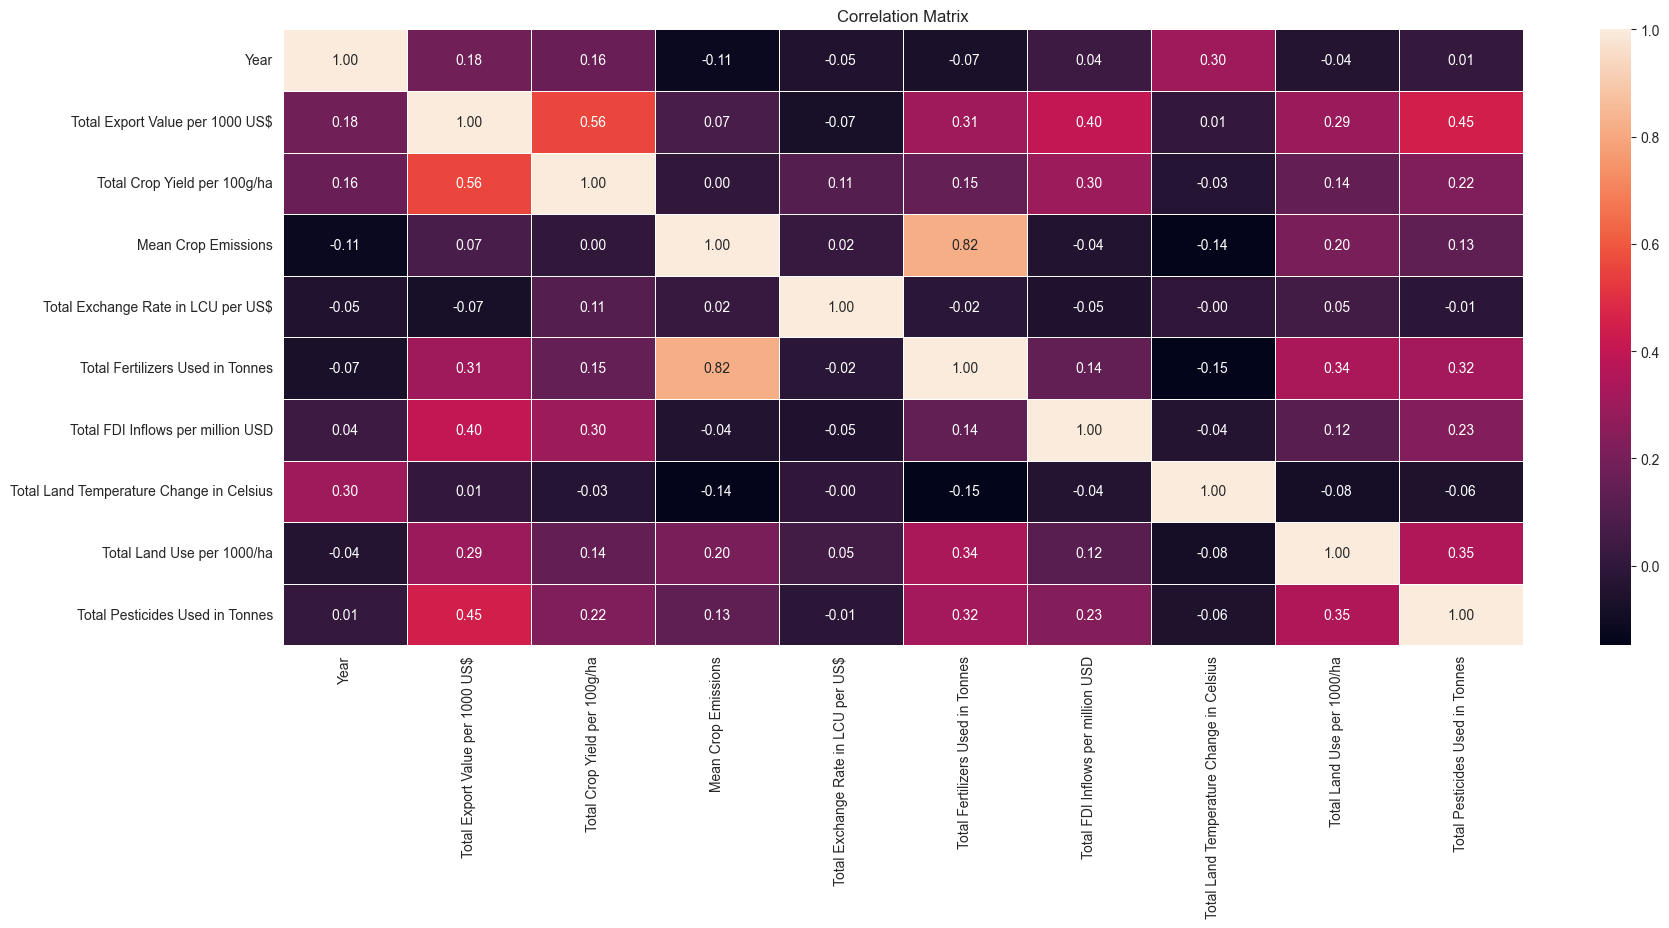

In [739]:
plt.figure(figsize=(20, 8))
sns.heatmap(required_features_corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [740]:
# Print the correlation values with the target variable
required_features_corr['Total Export Value per 1000 US$'].sort_values(ascending=False)

Total Export Value per 1000 US$             1.000000
Total Crop Yield per 100g/ha                0.555914
Total Pesticides Used in Tonnes             0.445120
Total FDI Inflows per million USD           0.402752
Total Fertilizers Used in Tonnes            0.306671
Total Land Use per 1000/ha                  0.293311
Year                                        0.181937
Mean Crop Emissions                         0.072197
Total Land Temperature Change in Celsius    0.007437
Total Exchange Rate in LCU per US$         -0.074694
Name: Total Export Value per 1000 US$, dtype: float64

In [741]:
# Select the features that are highly correlated with the target variable
merged_df = merged_df.drop(columns=['Total Exchange Rate in LCU per US$', 'Total Land Temperature Change in Celsius', 'Mean Crop Emissions'])

In [742]:
merged_df.shape

(54596, 8)

In [743]:
# Print merged_df
merged_df

,Area,Year,Total Export Value per 1000 US$,Total Crop Yield per 100g/ha,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes
0,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,330.78
1,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,179.44
2,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,7.98
3,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,110.43
4,Albania,2002,29392.00,1001031,39908.666667,133.056327,2875.0,0.07
...,...,...,...,...,...,...,...,...
61668,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,549.41
61669,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,359.59
61670,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,0.41
61671,Zimbabwe,2018,2036609.89,1099976,13372.690000,745.007943,39076.0,7.24


In [744]:
# Iterate over each column and remove NaN values, excluding 'Year' and 'Area'
for col in merged_df.columns:
    if col != 'Year' and col != 'Area':
        merged_df[col] = merged_df[col].dropna()

In [745]:
merged_df.shape

(54596, 8)

In [746]:
merged_df = merged_df.groupby(["Area", "Year"]).mean().reset_index()

In [747]:
merged_df.shape

(810, 8)

# 5. Data Preprocessing

In this section, I will preprocess the data for machine learning. I will perform the following preprocessing steps:
- Log-transform the numeric columns
- Standardize the numeric columns
- Encode the categorical columns
- Split the data into features and target variable
- Split the data into training and testing sets

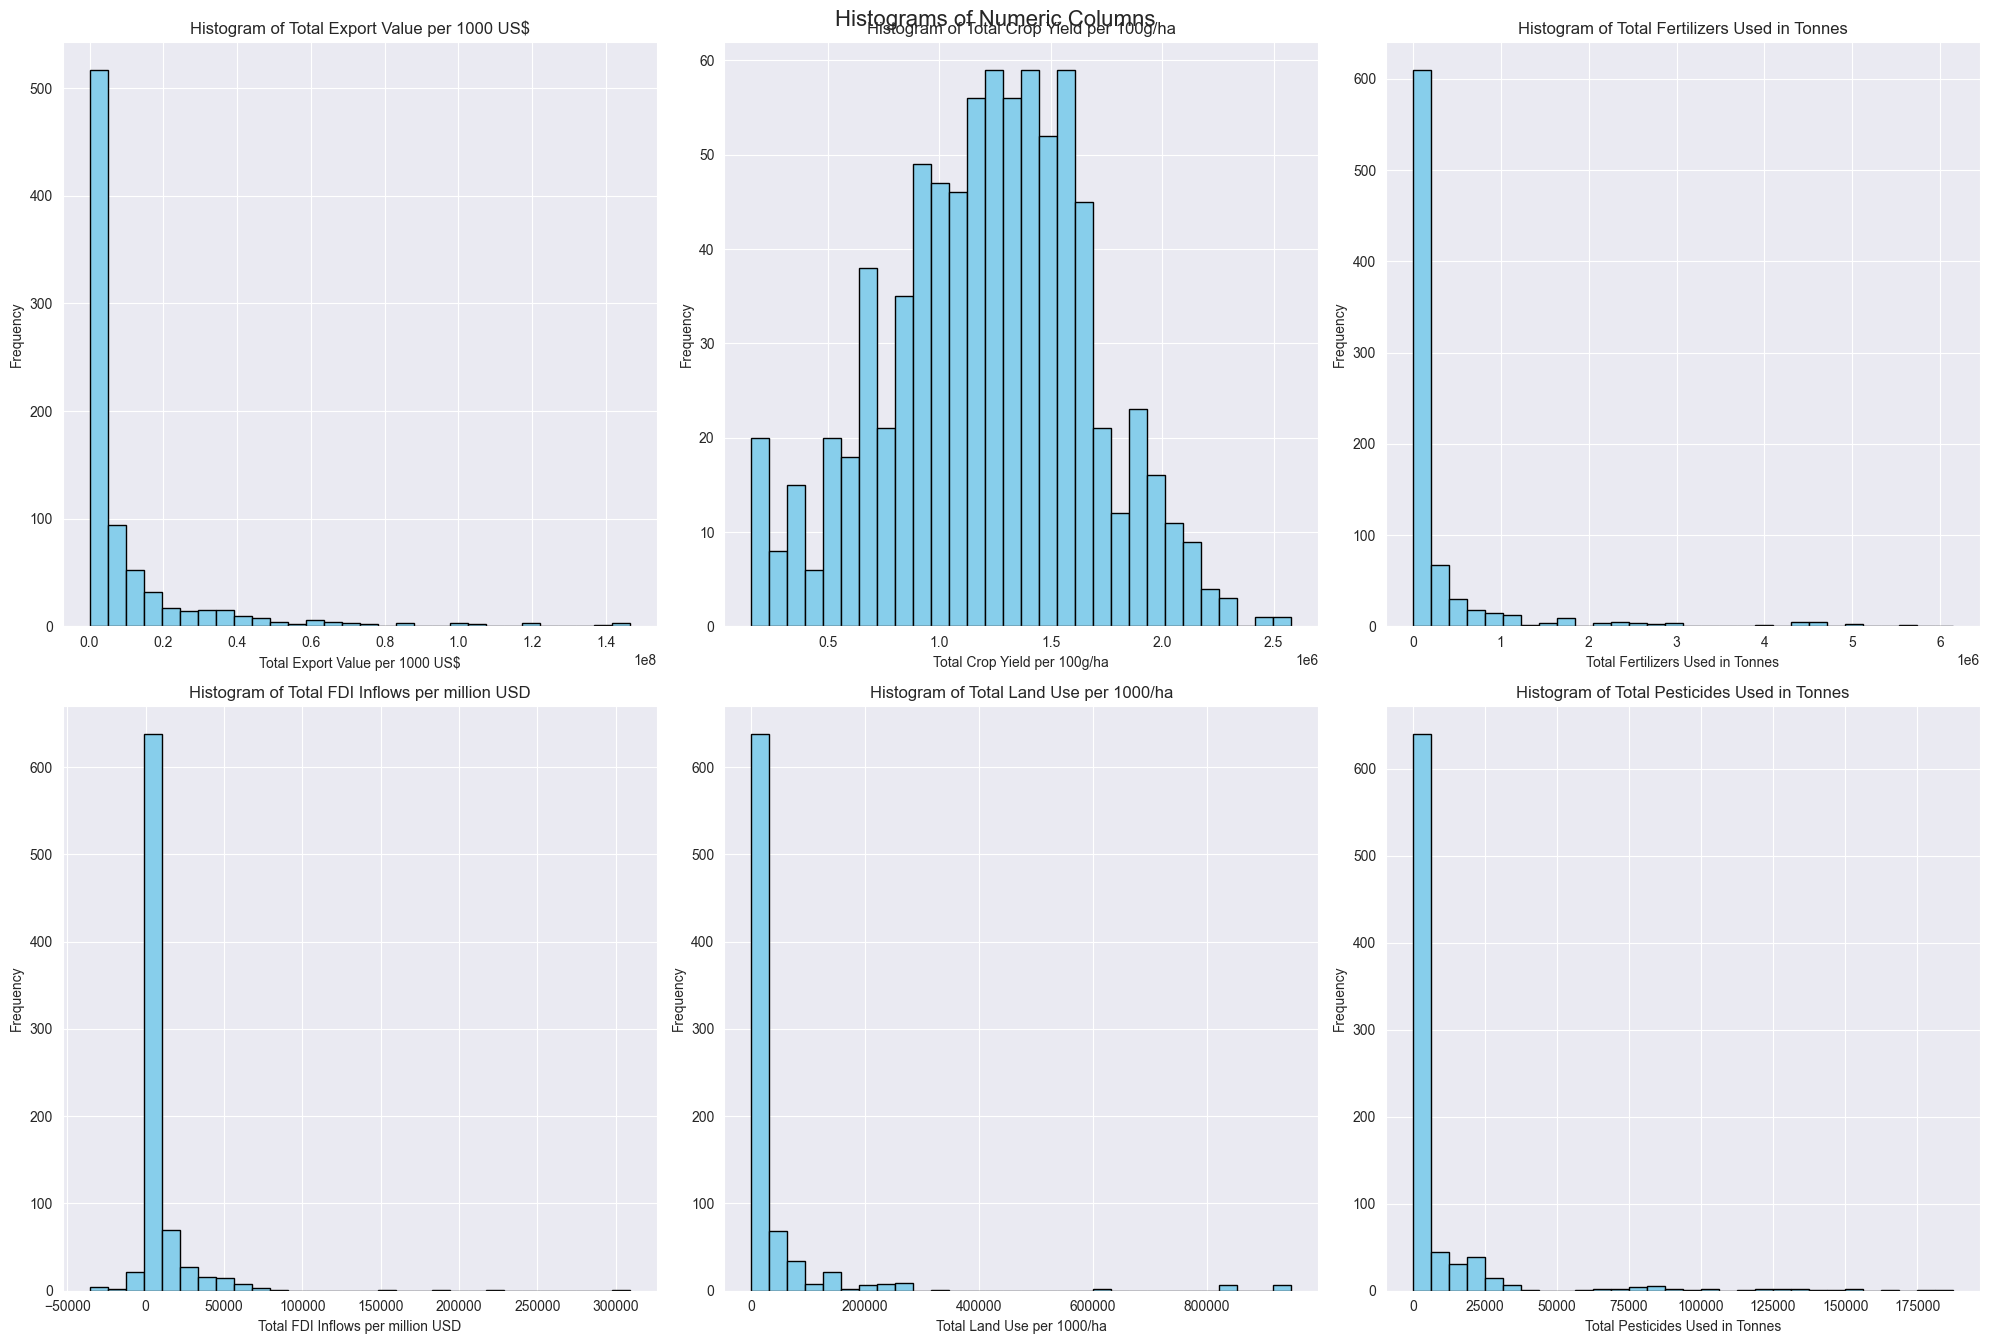

In [748]:
plt.figure(figsize=(20, 20))
plot_index = 1  # Start plotting at the first subplot position (1)
plt.suptitle('Histograms of Numeric Columns', fontsize=16)

# Iterate over each column
for column in merged_df.columns:
    if column in ['Year', 'Area']:  # Skip the 'Year' and 'Area' columns
        continue

    # Create a new subplot for each column
    plt.subplot(3, 3, plot_index)
    plt.hist(merged_df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plot_index += 1  # Increment the plot index only when a plot is made

plt.tight_layout() # Reduces overlapping between subplots
plt.show()

In [749]:
# Columns to log-transform
columns_to_log = ['Total FDI Inflows per million USD', 'Total Fertilizers Used in Tonnes', 'Total Pesticides Used in Tonnes', 'Total Land Use per 1000/ha', 'Total Export Value per 1000 US$']

# Log-transform specified columns
for column in columns_to_log:
    merged_df[column] = np.log1p(merged_df[column])

D:\ML-Coursework\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


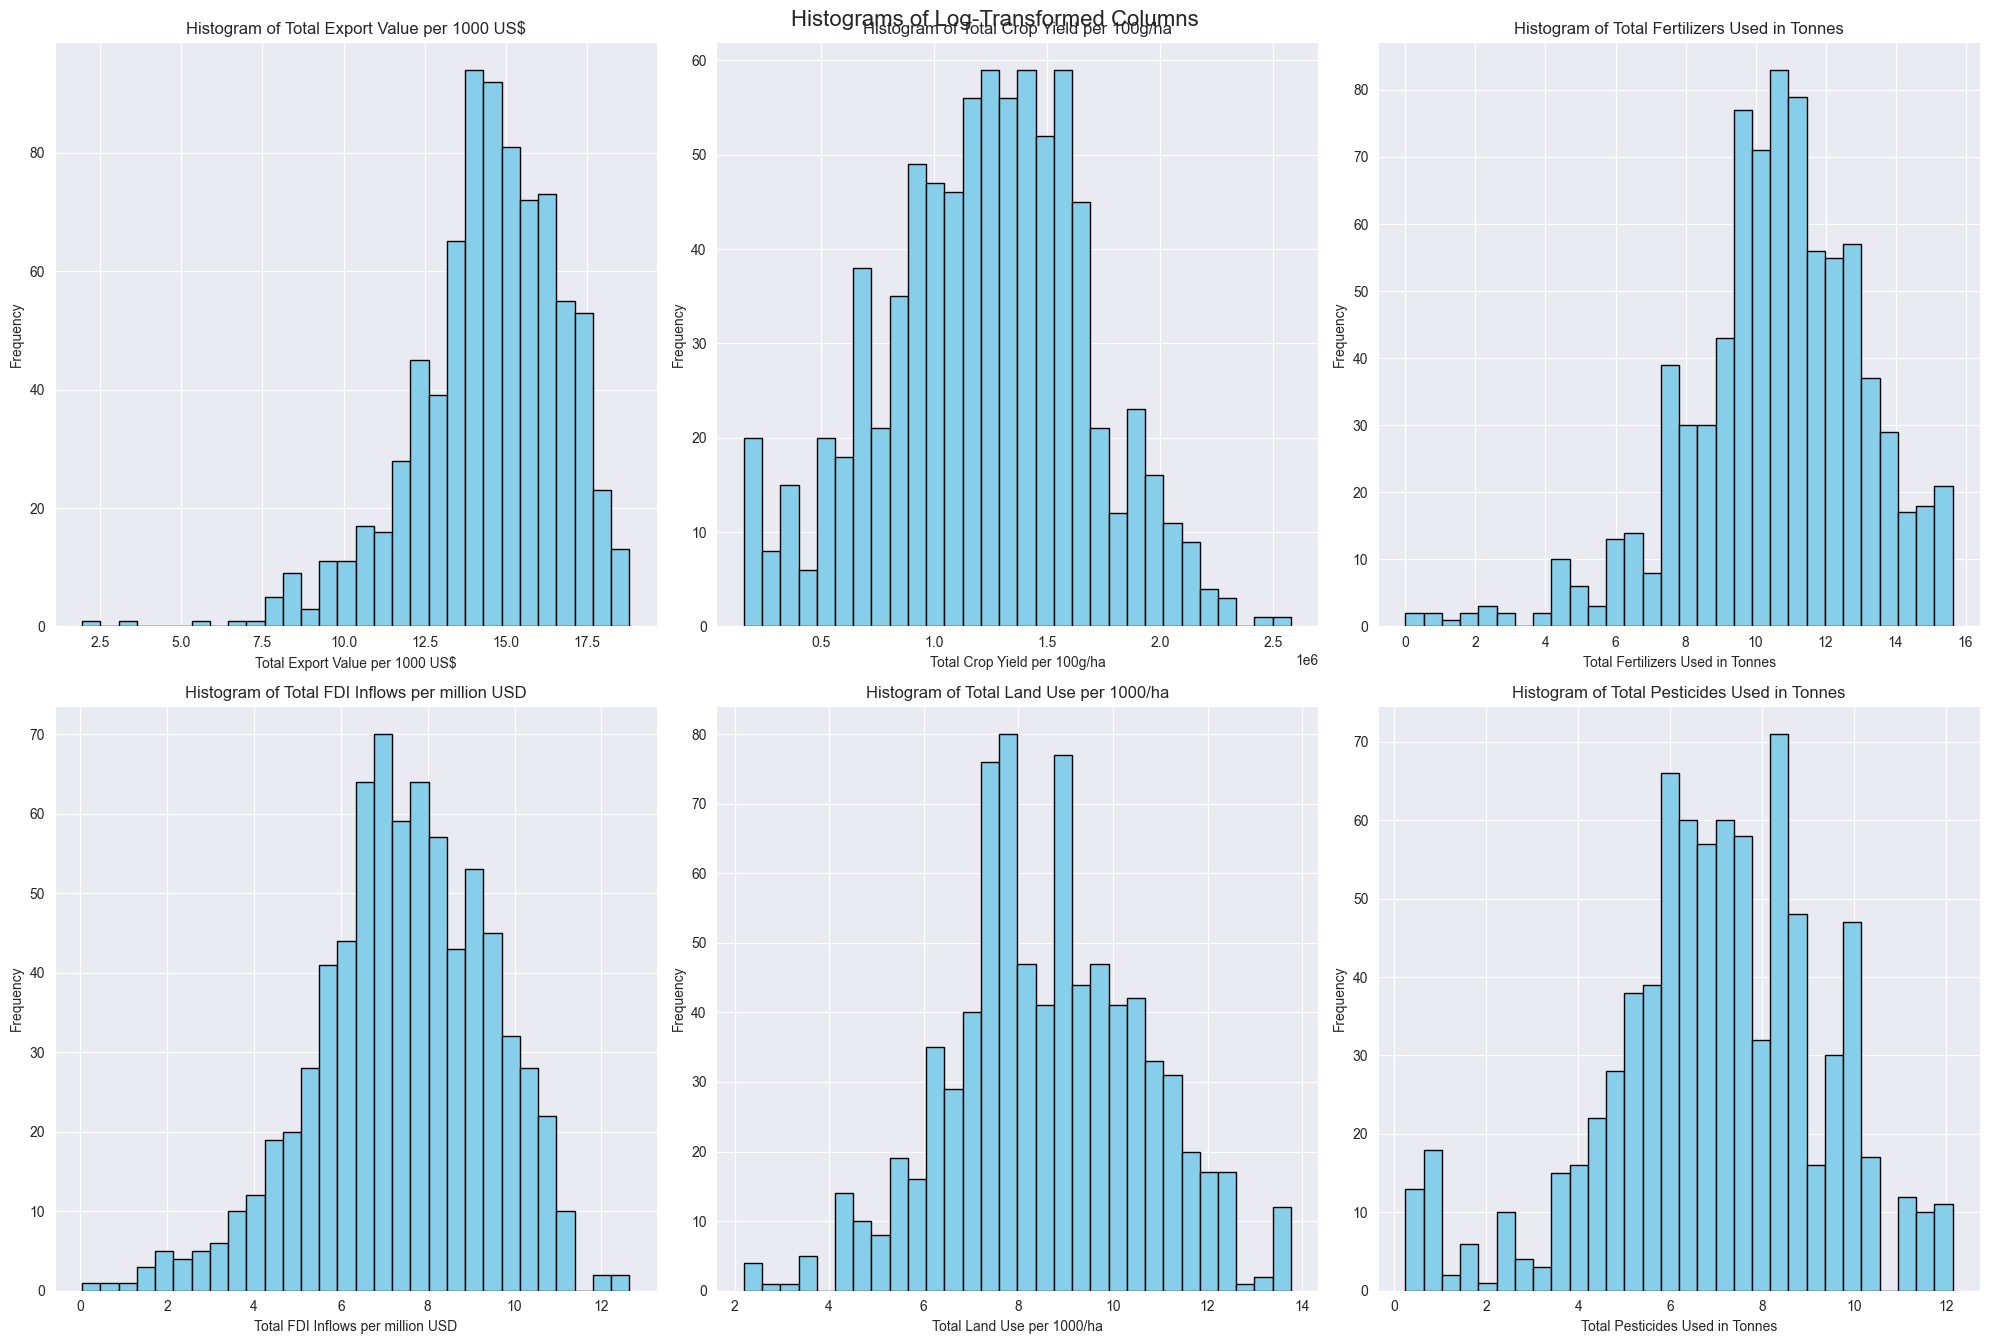

In [750]:
# Display histogram of log-transformed columns
plt.figure(figsize=(20, 20))
plot_index = 1  # Start plotting at the first subplot position (1)
plt.suptitle('Histograms of Log-Transformed Columns', fontsize=16)

# Iterate over each column
for column in merged_df.columns:
    if column in ['Year', 'Area']:  # Skip the 'Year' and 'Area' columns
        continue

    # Create a new subplot for each column
    plt.subplot(3, 3, plot_index)
    plt.hist(merged_df[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plot_index += 1  # Increment the plot index only when a plot is made

plt.tight_layout() # Reduces overlapping between subplots
plt.show()

In [751]:
merged_df.shape

(810, 8)

In [752]:
merged_df.describe()

,Year,Total Export Value per 1000 US$,Total Crop Yield per 100g/ha,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Pesticides Used in Tonnes
count,810.000000,810.000000,8.100000e+02,810.000000,751.000000,810.000000,810.000000
mean,2013.120988,14.454232,1.215917e+06,10.554159,7.413313,8.601421,6.934155
std,5.304818,2.289812,4.521080e+05,2.563796,2.008562,2.079137,2.389901
min,2002.000000,1.945910,1.569290e+05,0.000000,0.043721,2.195000,0.243730
25%,2009.000000,13.303845,9.181202e+05,9.331342,6.235970,7.356758,5.642940
50%,2014.000000,14.674597,1.237895e+06,10.654872,7.481152,8.603195,7.039981
75%,2018.000000,16.070850,1.530611e+06,12.181267,8.923737,10.109973,8.525818
max,2021.000000,18.802284,2.579116e+06,15.631204,12.640957,13.763109,12.141117


In [753]:
merged_df.shape

(810, 8)

In [754]:
# Check for NaN values
merged_df.isna().sum()

Area                                  0
Year                                  0
Total Export Value per 1000 US$       0
Total Crop Yield per 100g/ha          0
Total Fertilizers Used in Tonnes      0
Total FDI Inflows per million USD    59
Total Land Use per 1000/ha            0
Total Pesticides Used in Tonnes       0
dtype: int64

In [755]:
merged_df = merged_df.dropna() # Drop NaN values

merged_df.isna().sum()

Area                                 0
Year                                 0
Total Export Value per 1000 US$      0
Total Crop Yield per 100g/ha         0
Total Fertilizers Used in Tonnes     0
Total FDI Inflows per million USD    0
Total Land Use per 1000/ha           0
Total Pesticides Used in Tonnes      0
dtype: int64

In [756]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751 entries, 0 to 809
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Area                               751 non-null    object 
 1   Year                               751 non-null    int64  
 2   Total Export Value per 1000 US$    751 non-null    float64
 3   Total Crop Yield per 100g/ha       751 non-null    float64
 4   Total Fertilizers Used in Tonnes   751 non-null    float64
 5   Total FDI Inflows per million USD  751 non-null    float64
 6   Total Land Use per 1000/ha         751 non-null    float64
 7   Total Pesticides Used in Tonnes    751 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 52.8+ KB


In [757]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Split the data into features and target variable sorted by year
df = merged_df.sort_values('Year')
df.Year = df.Year.astype(str) # Convert 'Year' to string for use as a categorical feature
X = df.drop(columns=['Total Export Value per 1000 US$'])
y = df['Total Export Value per 1000 US$']

# Initialize scalers and encoders
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False ,handle_unknown='ignore') # Set handle_unknown='ignore' to avoid errors when new categories are encountered during encoding

def preprocess_data(X, scaler, encoder, fit=False):
    # Define numeric and categorical features
    numeric_features = ['Total Fertilizers Used in Tonnes', 'Total FDI Inflows per million USD', 'Total Land Use per 1000/ha', 'Total Crop Yield per 100g/ha', 'Total Pesticides Used in Tonnes']
    categorical_features = ['Area', 'Year']

    # Separate features
    X_numeric = X[numeric_features]
    X_categorical = X[categorical_features]

    # Scale numeric features and encode categorical features when fitting
    if fit:
        X_numeric_scaled = scaler.fit_transform(X_numeric)
        # When fitting, also obtain the feature names from the encoder
        X_categorical_encoded = encoder.fit_transform(X_categorical)
        categorical_feature_names = encoder.get_feature_names_out(categorical_features)
        
    # When transforming, use the fitted scaler and encoder
    else:
        X_numeric_scaled = scaler.transform(X_numeric)
        X_categorical_encoded = encoder.transform(X_categorical)
        categorical_feature_names = encoder.get_feature_names_out(categorical_features)

    # Convert arrays back to DataFrame to retain column names
    X_numeric_df = pd.DataFrame(X_numeric_scaled, columns=numeric_features, index=X.index)
    X_categorical_df = pd.DataFrame(X_categorical_encoded, columns=categorical_feature_names, index=X.index)

    # Concat numeric and categorical dfs with columns in the same order so that the final DataFrame has the same column order as the original DataFrame
    X_processed = pd.concat([X_numeric_df, X_categorical_df], axis=1)

    return X_processed

In [758]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for grid search 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [759]:
# Preprocess the training and testing data using function
X_train_processed = preprocess_data(X_train, scaler, encoder, fit=True)
X_test_processed = preprocess_data(X_test, scaler, encoder, fit=False)

In [760]:
X_train_processed

,Total Fertilizers Used in Tonnes,Total FDI Inflows per million USD,Total Land Use per 1000/ha,Total Crop Yield per 100g/ha,Total Pesticides Used in Tonnes,Area_Albania,Area_Argentina,Area_Armenia,Area_Australia,Area_Austria,...,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021
683,-0.298486,0.460380,-0.693800,-0.319087,-0.406958,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
702,-0.802787,-0.135100,-1.168144,-1.220468,-0.407092,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
439,-0.010132,-0.270383,-0.627953,-1.386144,-0.237232,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96,-2.040484,0.113144,0.739278,-0.826905,0.674740,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
480,-1.261484,-0.944498,-1.908183,-0.050694,-0.633671,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-1.943892,-0.956962,0.029797,-0.718841,-0.307707,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,-0.059935,0.546173,-0.476406,1.569178,0.047959,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394,0.586250,1.552131,-0.283732,0.846525,1.201787,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193,0.300271,-0.635932,-0.456644,0.063683,0.064906,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Model Building

In this section, I will build a machine learning model to predict the total export crop value in 1000 US$. I will use a Multi-Layer Perceptron (MLP) Regressor model for this task. I will use Grid Search to find the best hyperparameters for the model. I will also evaluate the model using the TimeSeriesSplit cross-validation method.

In [761]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPRegressor(random_state=25, max_iter=1000))
])

In [762]:
# Define the parameter grid for the search
parameter_space = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['tanh', 'relu'],
    'mlp__solver': ['sgd', 'adam'],
    'mlp__alpha': [0.0001, 0.05],
    'mlp__learning_rate': ['constant','adaptive'],
    'mlp__max_iter': [1000, 800, 600]
}

In [763]:
# Perform the grid search and fit the model
grid_search = GridSearchCV(pipeline, parameter_space, n_jobs=-1, cv=3)
grid_search.fit(X_train_processed, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPRegressor(max_iter=1000,
                                                     random_state=25))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['tanh', 'relu'],
                         'mlp__alpha': [0.0001, 0.05],
                         'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'mlp__learning_rate': ['constant', 'adaptive'],
                         'mlp__max_iter': [1000, 800, 600],
                         'mlp__solver': ['sgd', 'adam']})

In [764]:
# Print the best parameters and best score
print("Best parameters found:\n", grid_search.best_params_)
print("Best score achieved:", grid_search.best_score_)

Best parameters found:
 {'mlp__activation': 'tanh', 'mlp__alpha': 0.05, 'mlp__hidden_layer_sizes': (50, 50), 'mlp__learning_rate': 'adaptive', 'mlp__max_iter': 1000, 'mlp__solver': 'sgd'}
Best score achieved: 0.8823031244048741


In [765]:
from sklearn.ensemble import BaggingRegressor
import joblib
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define model with the best parameters given above
model = MLPRegressor(activation='relu', alpha=0.05, hidden_layer_sizes=(150, 150), learning_rate='adaptive', max_iter=1500, solver='sgd', random_state=25)

bagging_model = BaggingRegressor(estimator=model, n_estimators=10, random_state=25)

i = 1
# TimeSeriesSplit setup
tscv = TimeSeriesSplit(n_splits=20)

# Iterate through each split
for train_index, test_index in tscv.split(X):
    print("Fold  ", i) # Print fold number
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Preprocess data
    X_train_processed = preprocess_data(X_train, scaler, encoder, fit=True)
    X_test_processed = preprocess_data(X_test, scaler, encoder, fit=False)


    # Train the model
    bagging_model.fit(X_train_processed, y_train)

    # Make predictions
    y_pred = bagging_model.predict(X_test_processed)

    # Reverse the log transformation on predictions so it is in the original scale
    y_pred_original_scale = np.expm1(y_pred)

    # Calculate and print the mean absolute error
    mae = mean_absolute_error(np.expm1(y_test), y_pred_original_scale)
    print(f"Mean Absolute Error: {mae}")

    # Calculate and print the R2 score
    r2 = r2_score(np.expm1(y_test), y_pred_original_scale)
    print(f"R2 Score: {r2}")

    # Calculate and print the adjusted R2 score (adjusted for number of predictors)
    n_samples = X_test_processed.shape[0]
    n_predictors = X_test_processed.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1)
    print(f"Adjusted R2 Score: {adjusted_r2}")
    print()
    print()
    i += 1 # Increment count to keep track of how many folds have been done
    # joblib.dump(model, 'model/model_new'+str(adjusted_r2)+'.pkl')


Fold   1
Mean Absolute Error: 2882696.677423496
R2 Score: 0.509464479539881
Adjusted R2 Score: 9.339103847822022


Fold   2
Mean Absolute Error: 1952323.3058181682
R2 Score: 0.08359894174435922
Adjusted R2 Score: 8.789408995172947


Fold   3
Mean Absolute Error: 1863355.5174817522
R2 Score: 0.805010294220919
Adjusted R2 Score: 1.5099730766529813


Fold   4
Mean Absolute Error: 5691884.068340674
R2 Score: 0.6832063830558006
Adjusted R2 Score: 1.414268576003953


Fold   5
Mean Absolute Error: 8993316.53745443
R2 Score: 0.3101372419869175
Adjusted R2 Score: 1.7107676900740851


Fold   6
Mean Absolute Error: 5094317.95322921
R2 Score: 0.7814686787388969
Adjusted R2 Score: 1.19552802428625


Fold   7
Mean Absolute Error: 8721929.13436533
R2 Score: 0.6969033018746558
Adjusted R2 Score: 1.229006394139149


Fold   8
Mean Absolute Error: 3873415.0278806267
R2 Score: 0.6689528957945421
Adjusted R2 Score: 1.2251120308597114


Fold   9
Mean Absolute Error: 6612313.140866358
R2 Score: 0.71764821857

In [766]:
X_train_processed.shape

(716, 123)

# 7. Model Evaluation

In this section, I will evaluate the model using the following metrics:
- Mean Absolute Error (MAE)
- R2 Score
- Adjusted R2 Score
- Scatter plot of predicted vs actual values
- Residual plot
- Density plot of actual vs predicted values
- Training and testing scores to check for overfitting

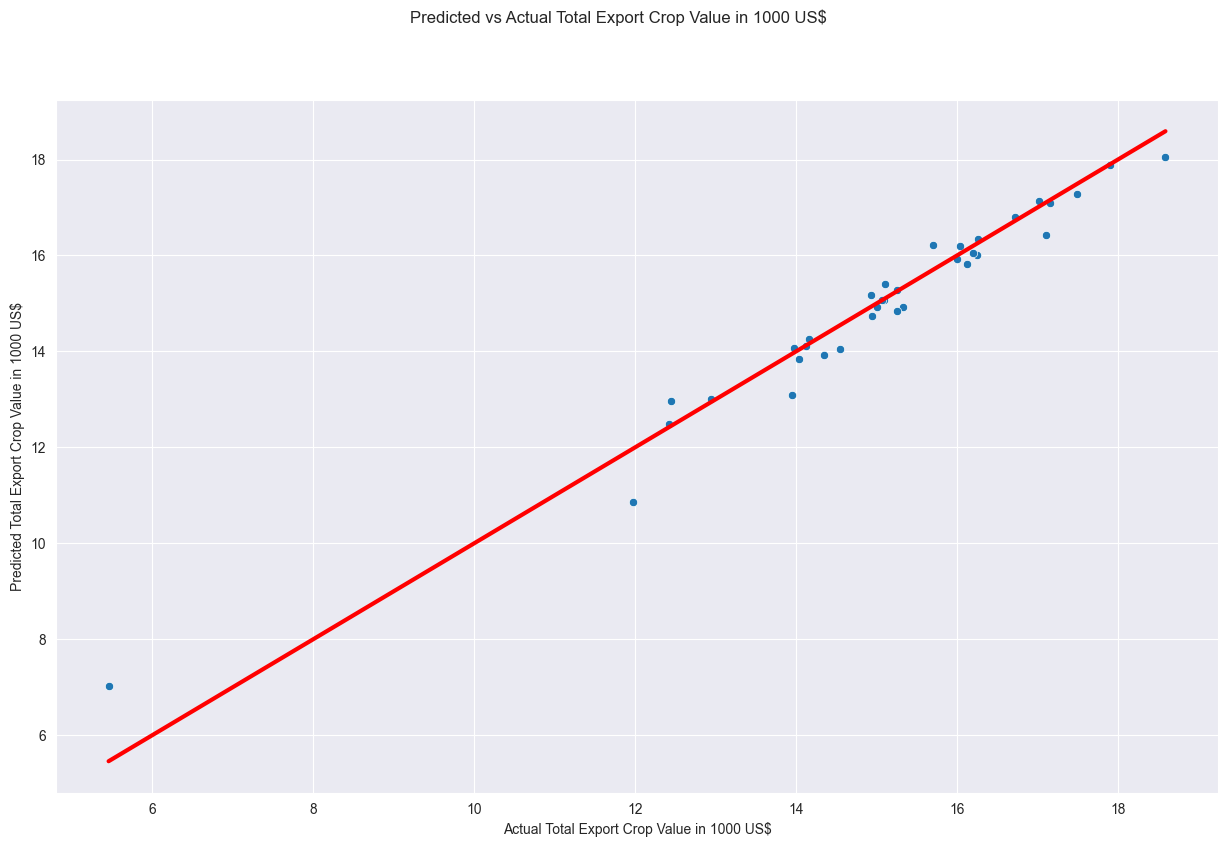

In [767]:
# Plotting the results as a scatter plot
fig, ax = plt.subplots(figsize=(15,9))
plt.suptitle("Predicted vs Actual Total Export Crop Value in 1000 US$")
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
# Add a line for predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
plt.xlabel("Actual Total Export Crop Value in 1000 US$")
plt.ylabel("Predicted Total Export Crop Value in 1000 US$")
plt.show()

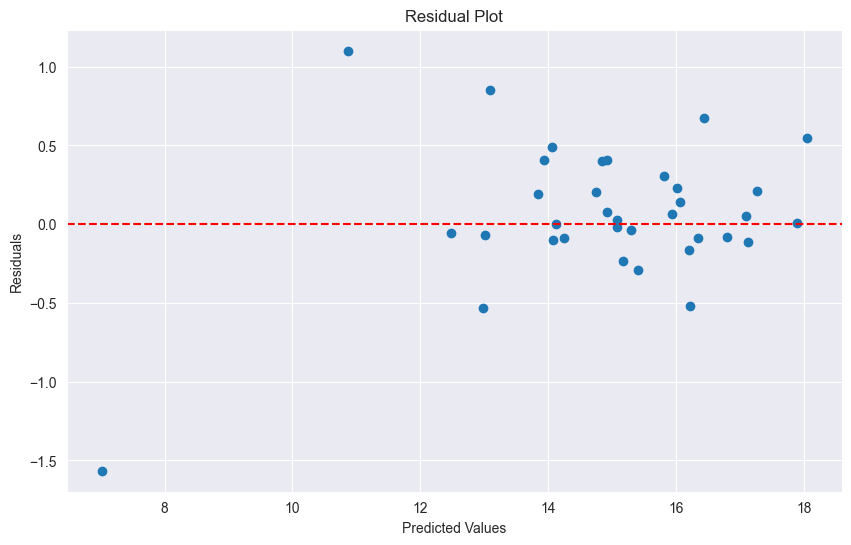

In [768]:
# Calculate residuals
residuals = y_test - y_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

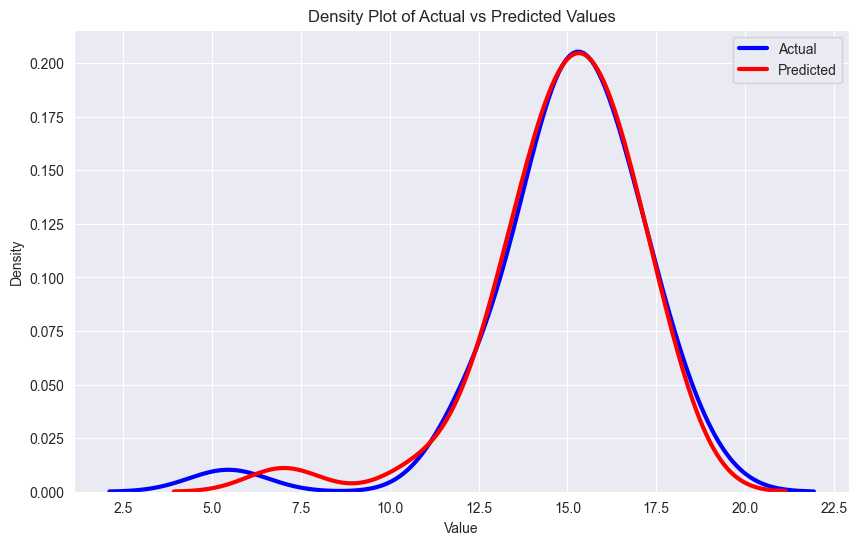

In [769]:
# Plot the density plot of actual vs predicted values
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, label='Actual', color='blue', linewidth=3)
sns.kdeplot(y_pred, label='Predicted', color='red', linewidth=3)
plt.title('Density Plot of Actual vs Predicted Values')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

In [770]:
print(df.isna().sum())

Area                                 0
Year                                 0
Total Export Value per 1000 US$      0
Total Crop Yield per 100g/ha         0
Total Fertilizers Used in Tonnes     0
Total FDI Inflows per million USD    0
Total Land Use per 1000/ha           0
Total Pesticides Used in Tonnes      0
dtype: int64


In [773]:
# Get the training score
training_score = bagging_model.score(X_train_processed, y_train)
print(f'Training Score: {training_score}')

# Get the testing score
testing_score = bagging_model.score(X_test_processed, y_test)
print(f'Testing Score: {testing_score}')

# Check for overfitting
if training_score - testing_score > 0.1:
    print('The model is overfitting')
else:
    print('The model is not overfitting')

Training Score: -0.24733522806424113
Testing Score: -0.30474599714785255
The model is not overfitting
